In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/content/imigrantes_canada.csv")
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
df.set_index("País", inplace=True)
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
anos = list(map(str, range(1980, 2014)))
brasil = df.loc['Brasil', anos]
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


In [5]:
brasil_dict = {'Ano': brasil.index.tolist(), 'Imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil.head()

,Ano,Imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


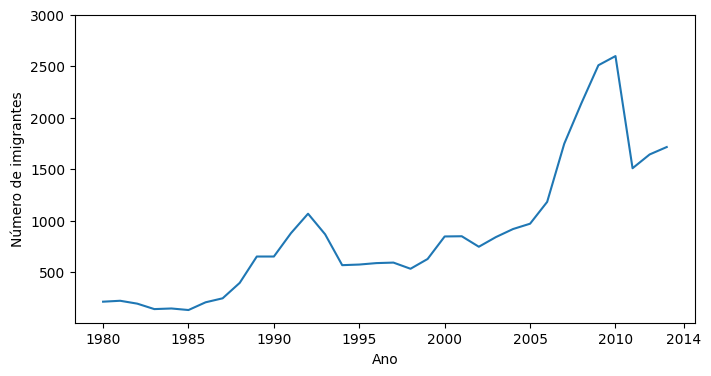

In [6]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010','2014'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.show()

In [7]:
df_comparacao = df.loc[['Brasil', 'Argentina', 'Chile'], anos]
df_comparacao = df_comparacao.T
df_comparacao.head()

País,Brasil,Argentina,Chile
1980,211,368,1233
1981,220,426,1069
1982,192,626,1078
1983,139,241,781
1984,145,237,681


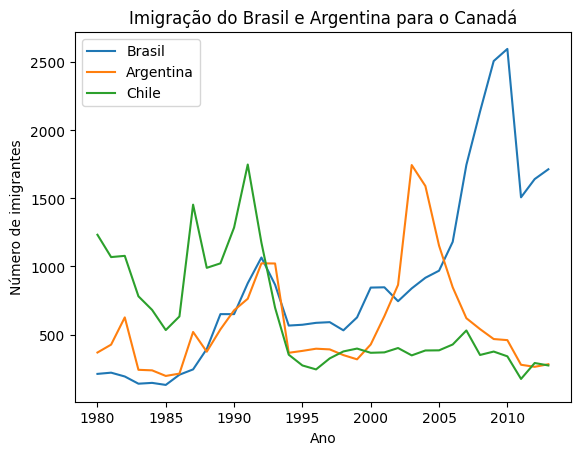

In [8]:
plt.plot(df_comparacao['Brasil'],label = 'Brasil')
plt.plot(df_comparacao['Argentina'],label ='Argentina')
plt.plot(df_comparacao['Chile'],label ='Chile')
plt.title('Imigração do Brasil e Argentina para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.legend()
plt.show()

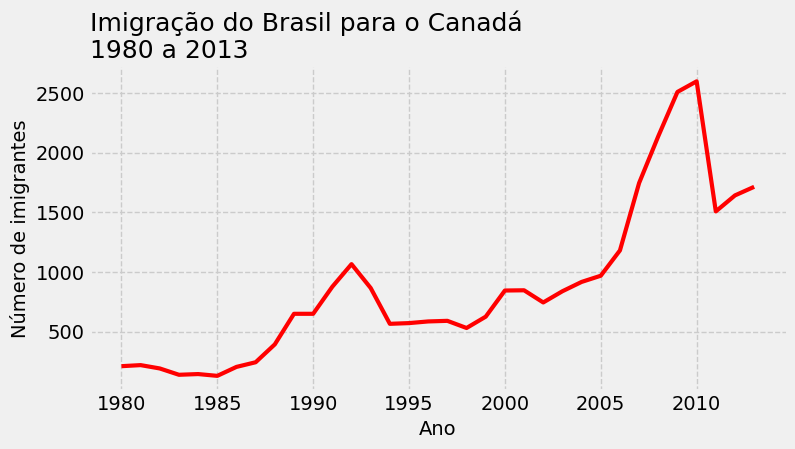

In [9]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], lw=3, color="r")
  ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize= 18, loc="left")
  ax.set_xlabel('Ano', fontsize= 14)
  ax.set_ylabel('Número de imigrantes', fontsize= 14)
  ax.tick_params(axis='both', labelsize= 14)
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  plt.grid(linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

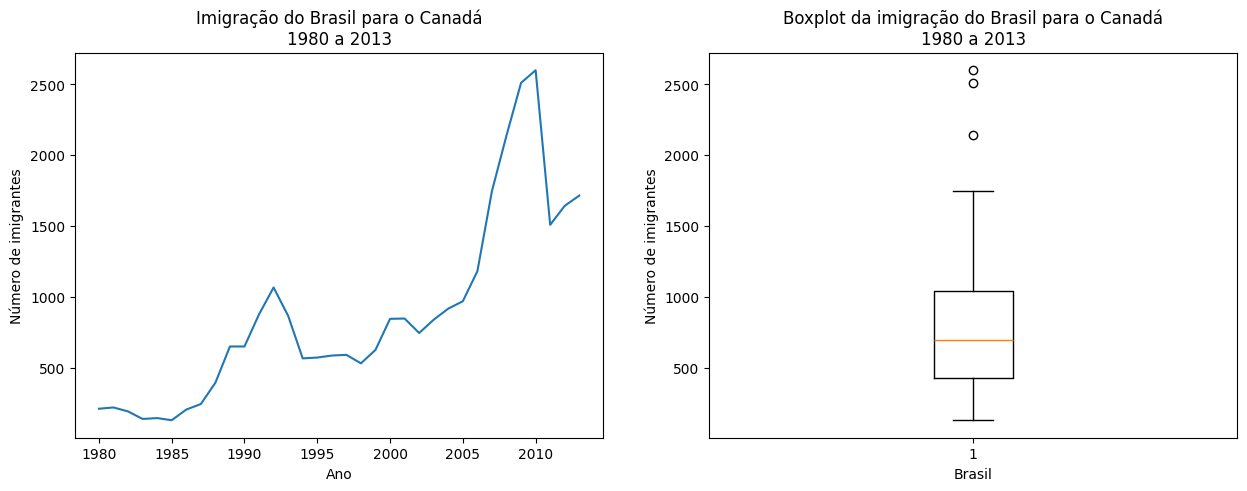

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['Ano'], dados_brasil['Imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))

axs[1].boxplot(dados_brasil['Imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')


plt.show()

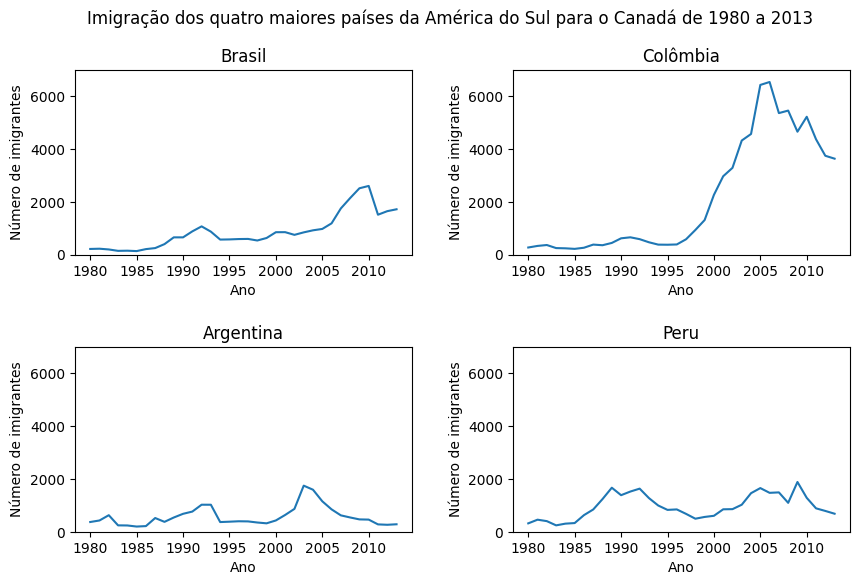

In [11]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')


axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de imigrantes')


ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

plt.show()

In [12]:
america_sul = df.query('Região == "América do Sul"')
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


In [13]:
america_sul_ordenado = america_sul.sort_values('Total', ascending=False)

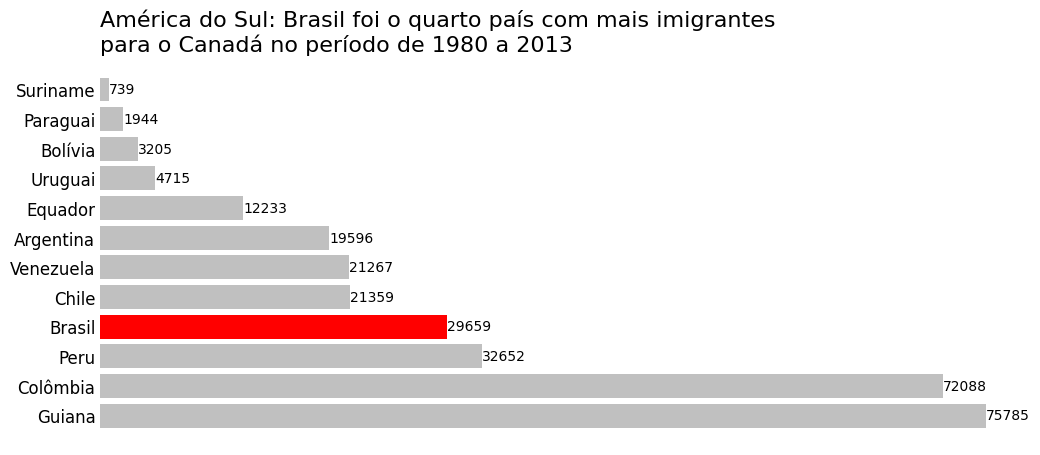

In [14]:
cores = []
for pais in america_sul_ordenado.index:
    if pais == 'Brasil':
        cores.append('red')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_ordenado.index, america_sul_ordenado['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

for i, v in enumerate(america_sul_ordenado['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both',which='both',length=0)

plt.show()

In [15]:
sns.set_theme(style='whitegrid')

In [16]:
top_10 = df.sort_values('Total',ascending=False).head(10)
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


/tmp/ipython-input-17-610599308.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette='Blues_r')


<Axes: xlabel='Total', ylabel='País'>

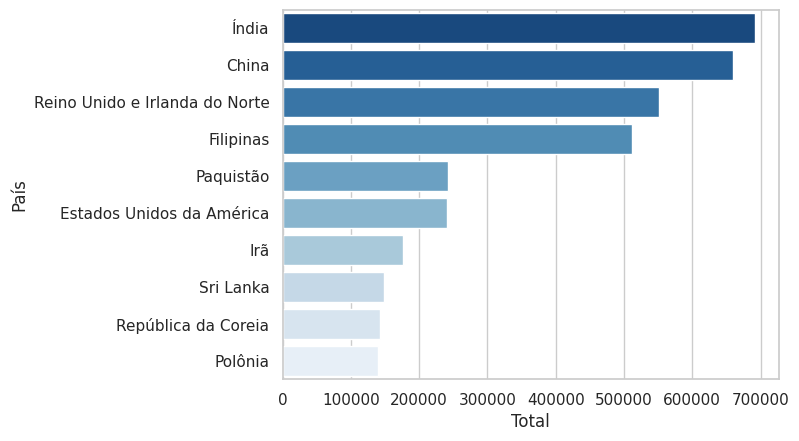

In [17]:
sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette='Blues_r')

/tmp/ipython-input-18-768394339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette='Blues_r')


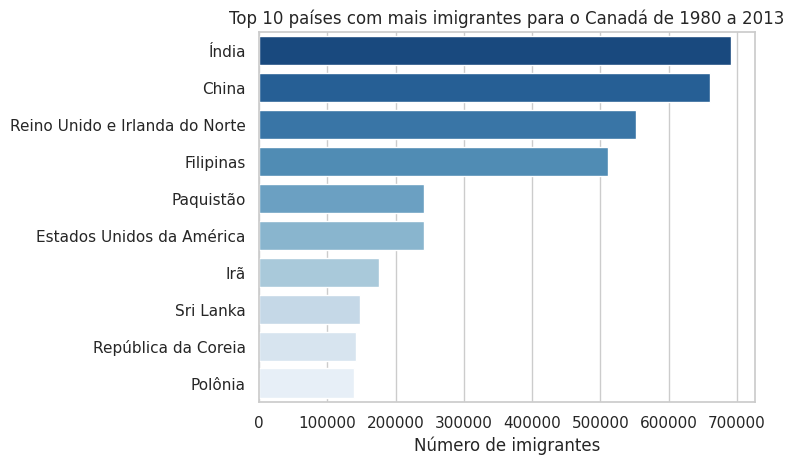

In [18]:
ax = sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette='Blues_r')

ax.set(title='Top 10 países com mais imigrantes para o Canadá de 1980 a 2013', xlabel='Número de imigrantes', ylabel='')

plt.show()

/tmp/ipython-input-19-617948200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette='Blues_r',ax=ax)


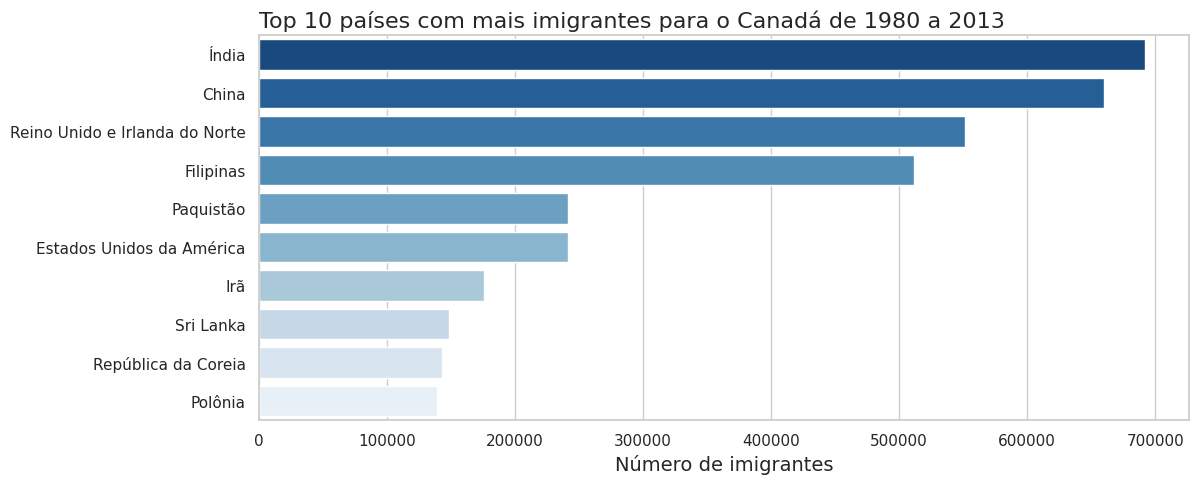

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette='Blues_r',ax=ax)

ax.set_title('Top 10 países com mais imigrantes para o Canadá de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')

plt.show()

In [20]:
def gerar_grafico_paleta(palette):
  fig, ax = plt.subplots(figsize=(12, 5))
  ax = sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette=palette,ax=ax)
  ax.set_title('Top 10 países com mais imigrantes para o Canadá de 1980 a 2013', loc='left', fontsize=16)
  ax.set_xlabel('Número de imigrantes', fontsize=14)

  plt.show()

/tmp/ipython-input-20-3646464006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette=palette,ax=ax)


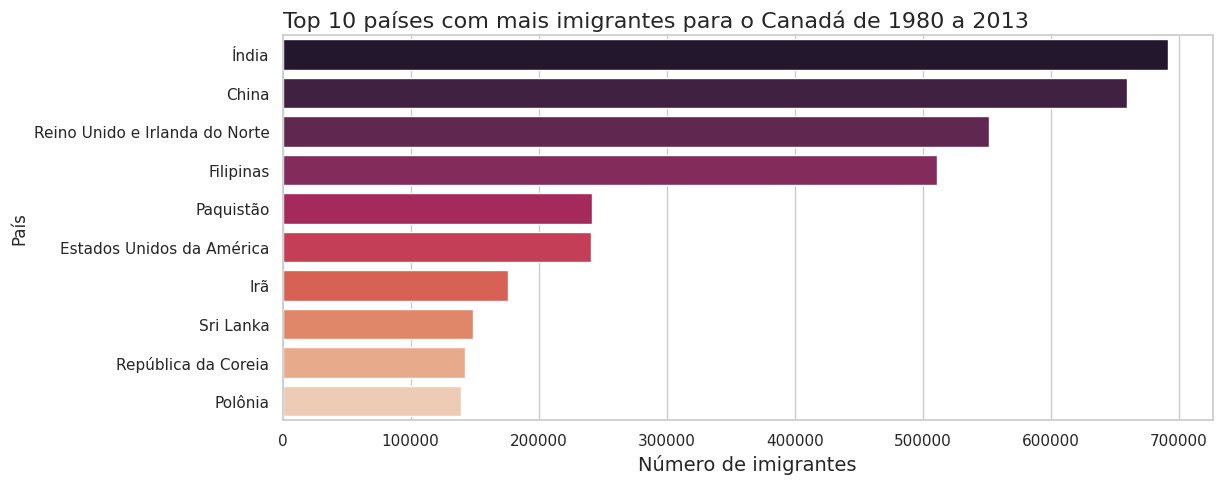

In [21]:
gerar_grafico_paleta('rocket')

/tmp/ipython-input-20-3646464006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10,y=top_10.index,x=top_10['Total'],orient='h',palette=palette,ax=ax)


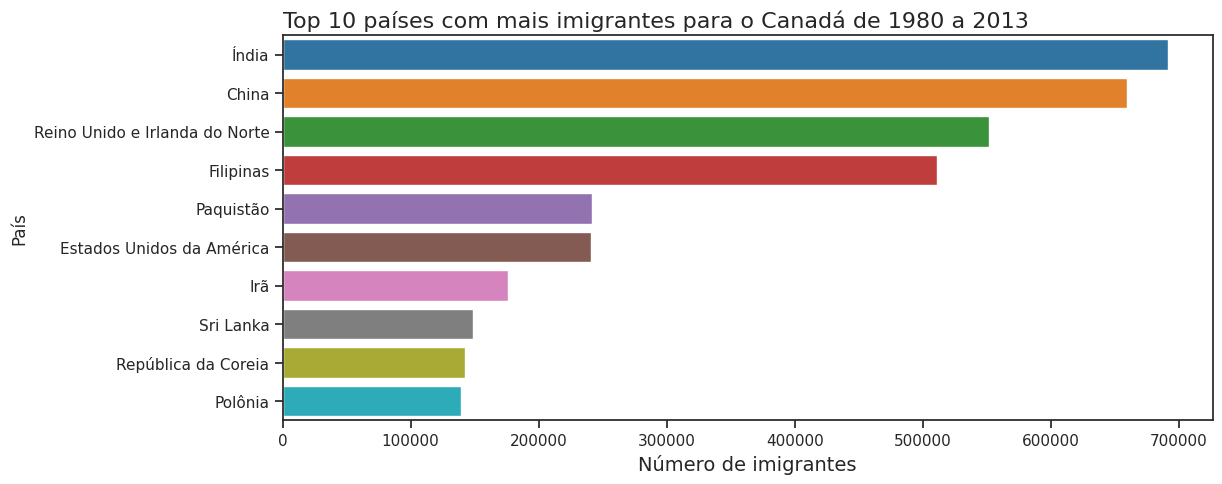

In [22]:
sns.set_theme(style='ticks')
gerar_grafico_paleta('tab10')

/tmp/ipython-input-23-2220088217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')


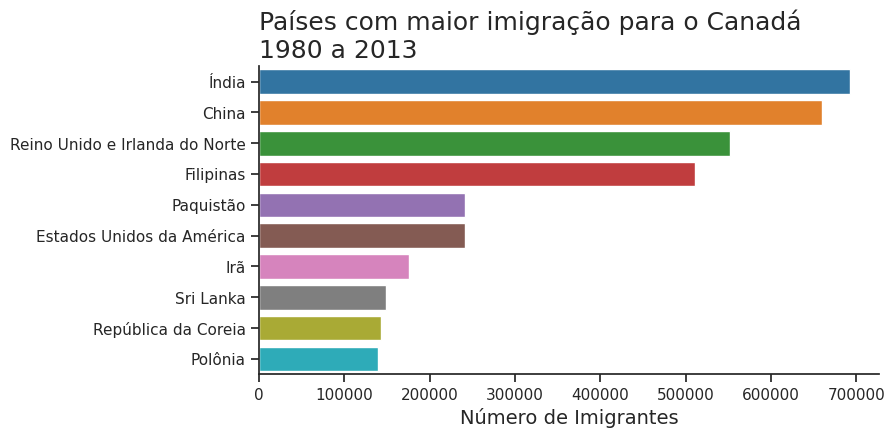

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')

ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de Imigrantes', fontsize=14)
ax.set_ylabel('')
#tira a linha da parte de cima do gráfico e da parte esquerda
sns.despine()

plt.show()

In [36]:
figura = px.line(dados_brasil,x='Ano',y='Imigrantes', title="Imigração do Brasil para o Canadá de 1980 a 2013" )
figura.update_traces(line_color='red',line_width=4)
figura.update_layout(width=1000, height= 500,
                     xaxis_title='Ano',yaxis_title='Número de imigrantes',
                     xaxis={'tickangle':-45},
                     font_family='Arial',
                     font_size=14,font_color='grey',
                     title_font_size=22,
                     title_font_color='black')
figura.show()

In [41]:
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T

america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [43]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País', markers=True,
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()
fig.write_html('imigracao_america_sul.html')